In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor ,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score ,mean_absolute_error, mean_squared_error

In [3]:
file_path='train_data.csv'
df=pd.read_csv(file_path)

df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [5]:
df.shape

(20000, 12)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20000.0,10000.500000,5773.647028,1.00,5000.75,10000.50,15000.25,20000.00
duration,20000.0,12.177627,7.157944,0.83,6.83,11.25,16.08,38.58
days_left,20000.0,25.924150,13.624874,1.00,14.00,26.00,38.00,49.00
price,20000.0,20960.281700,22775.459535,1105.00,4783.00,7425.00,42521.00,114523.00


In [7]:
df.isna().sum()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
df.duplicated().sum()

0

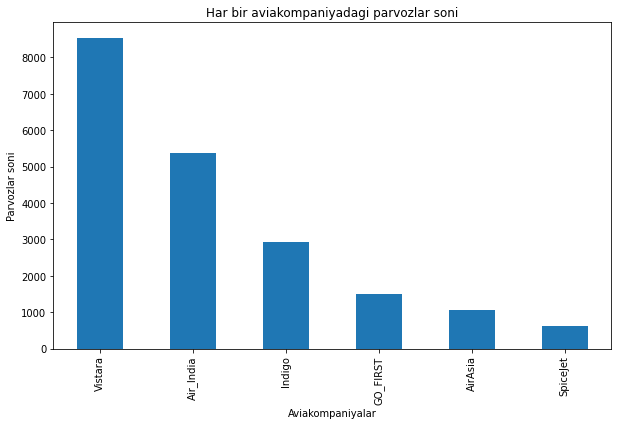

In [9]:
plt.figure(figsize=(10,6))
plt.title("Har bir aviakompaniyadagi parvozlar soni")
df['airline'].value_counts().plot(kind='bar')
plt.xlabel("Aviakompaniyalar")
plt.ylabel("Parvozlar soni")
plt.show()

In [10]:
df['flight'].value_counts()

UK-706     208
UK-720     190
UK-822     178
UK-836     169
UK-772     169
          ... 
6E-2471      1
6E-821       1
SG-1031      1
6E-759       1
6E-7201      1
Name: flight, Length: 1310, dtype: int64

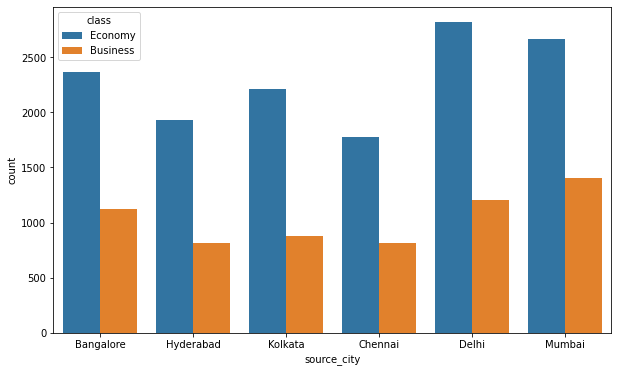

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='source_city',hue='class')
plt.show()

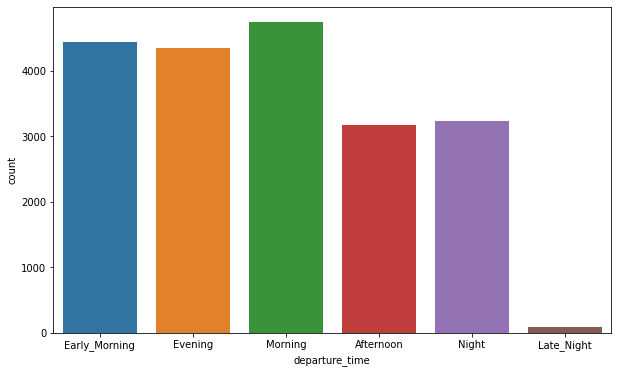

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='departure_time')
plt.show()

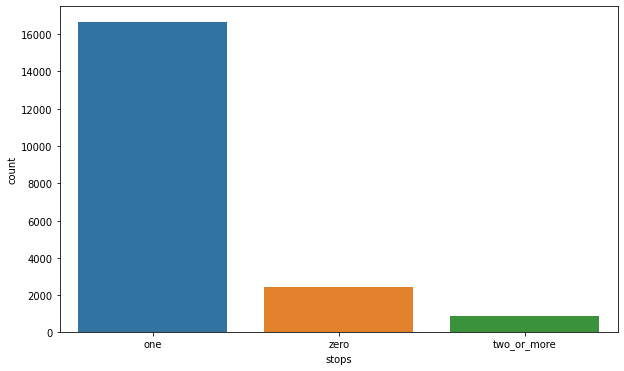

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='stops')
plt.show()

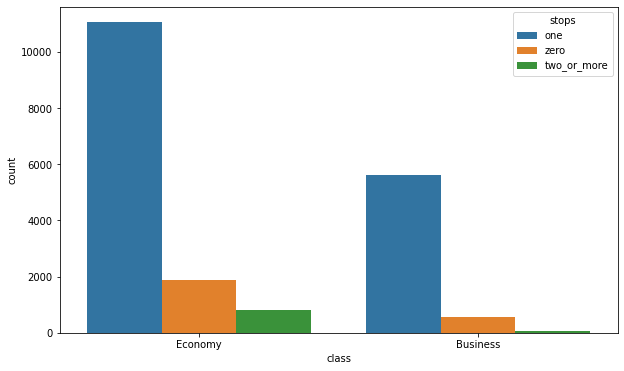

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='class',hue='stops')
plt.show()

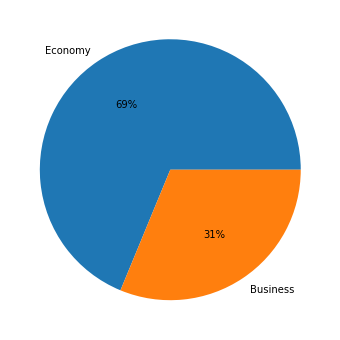

In [15]:
data=df['class'].value_counts()
keys=['Economy','Business']

plt.figure(figsize=(6,6))
palette_color = sns.color_palette('bright')
  
plt.pie(data,labels=keys,autopct='%.0f%%')
plt.show()

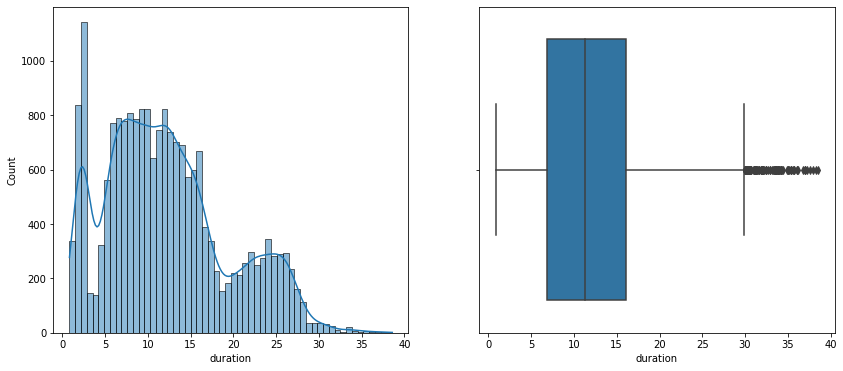

In [16]:
fig , ax= plt.subplots(1,2,figsize=(14,6))

sns.histplot(data=df,x='duration',kde=True,ax=ax[0])

sns.boxplot(data=df,x='duration',ax=ax[1])
plt.show()


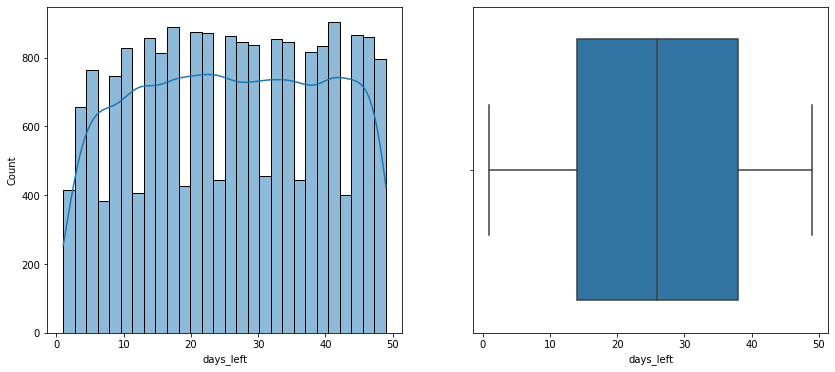

In [17]:
fig , ax= plt.subplots(1,2,figsize=(14,6))

sns.histplot(data=df,x='days_left',kde=True,ax=ax[0])

sns.boxplot(data=df,x='days_left',ax=ax[1])
plt.show()


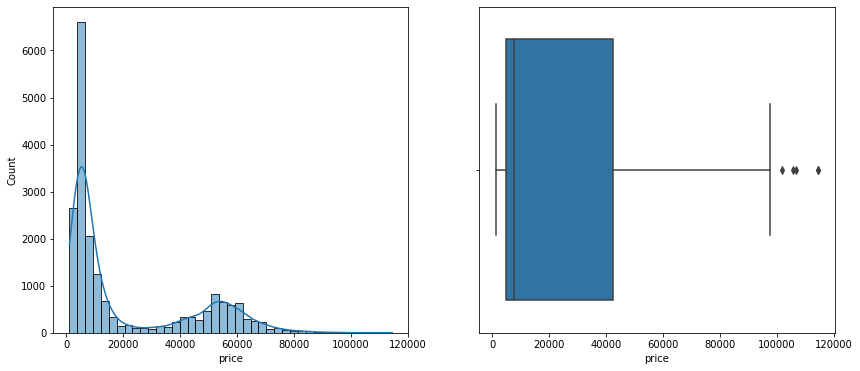

In [18]:
fig , ax= plt.subplots(1,2,figsize=(14,6))

sns.histplot(data=df,x='price',kde=True,ax=ax[0])

sns.boxplot(data=df,x='price',ax=ax[1])
plt.show()


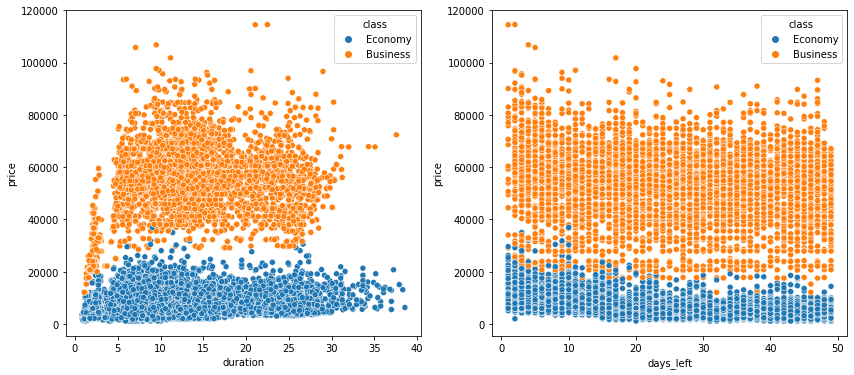

In [19]:
fig , ax= plt.subplots(1,2,figsize=(14,6))

sns.scatterplot(data=df,x='duration',y='price',ax=ax[0],hue='class')

sns.scatterplot(data=df,x='days_left',y='price',ax=ax[1],hue='class')
plt.show()


In [20]:
df.corrwith(df['price']).abs().sort_values(ascending=False)

price        1.000000
duration     0.213158
days_left    0.102545
id           0.002443
dtype: float64

In [21]:
labels=['id','flight']
df.drop(labels=labels,axis=1,inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [23]:
cat_columns=[]
num_columns=[]
for col in df.columns:
    if df[col].dtypes=='object':
        cat_columns.append(col)
    else:
        num_columns.append(col)
        
cat_columns=df[cat_columns]
num_columns=df[num_columns]

In [24]:
def encoder(df,cols):
    for col in cols:
        values=df[col].unique()
        dict1={key:index for index,key in enumerate(values)}
        df[col]=df[col].map(dict1)
        
   
    return df

In [25]:
encoder(df,cat_columns)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,0,0,0,0,0,0,14.25,21,7212
1,1,1,1,1,0,1,0,1.75,7,5292
2,0,0,2,0,1,2,1,9.58,5,60553
3,0,2,2,0,1,3,0,6.75,28,5760
4,2,3,0,1,2,0,0,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...
19995,2,0,4,0,4,0,0,7.92,45,3153
19996,5,2,2,0,3,2,0,5.83,24,3911
19997,0,3,0,2,1,5,0,35.33,17,14822
19998,0,5,1,0,2,5,0,16.33,21,6450


In [26]:
df.corrwith(df['price']).abs().sort_values(ascending=False)

price               1.000000
class               0.937868
airline             0.319172
duration            0.213158
stops               0.170436
arrival_time        0.105894
days_left           0.102545
departure_time      0.015704
source_city         0.006176
destination_city    0.002565
dtype: float64

In [27]:
def removeOutliers(df, columns):
    
    
    for c in columns:
        # first quartile
        Q1 = np.percentile(df[c],25)
        # third quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # multiplier for outlier detection
        outlier_step = IQR * 1.5
        # detect outlier and outlier index
        idx = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        df.drop(idx,axis=0,inplace=True)
        
  
    
removeOutliers(df,['price']) 

In [28]:
df.corrwith(df['price']).abs().sort_values(ascending=False)

price               1.000000
class               0.938444
airline             0.318814
duration            0.213254
stops               0.171220
arrival_time        0.105904
days_left           0.101322
departure_time      0.016185
source_city         0.005860
destination_city    0.002642
dtype: float64

In [29]:
X=df.columns[:-1]
y=df.columns[-1]

X=df[X]
y=df[y]

In [30]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [31]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
def getMetrics(models):
    df_metrics=pd.DataFrame(columns=['Model','MAE','RMSE','R2_score'])
    for model in models:
        model.fit(X_train,y_train)
        y_predict=model.predict(X_test)

        mae=mean_absolute_error(y_test,y_predict)
        rmse=np.sqrt(mean_squared_error(y_test,y_predict))
        r2=r2_score(y_test,y_predict)
        df_metrics=df_metrics.append({'Model':str(model),'MAE':mae,'RMSE':rmse,'R2_score':r2},ignore_index=True)
    return df_metrics

In [33]:
models=[Ridge(),RandomForestRegressor(),ExtraTreesRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor(),CatBoostRegressor(),LinearRegression()]
results=getMetrics(models)


Learning rate set to 0.063447
0:	learn: 21435.4632413	total: 60ms	remaining: 59.9s
1:	learn: 20199.4108116	total: 62.6ms	remaining: 31.3s
2:	learn: 19064.2515787	total: 65.2ms	remaining: 21.7s
3:	learn: 17983.2996379	total: 68.5ms	remaining: 17s
4:	learn: 16981.4638176	total: 71.8ms	remaining: 14.3s
5:	learn: 16069.2622355	total: 74ms	remaining: 12.3s
6:	learn: 15178.0113822	total: 77.2ms	remaining: 11s
7:	learn: 14364.8908781	total: 80.4ms	remaining: 9.97s
8:	learn: 13604.5275666	total: 83.7ms	remaining: 9.21s
9:	learn: 12892.4705612	total: 87ms	remaining: 8.61s
10:	learn: 12238.5947633	total: 90.3ms	remaining: 8.12s
11:	learn: 11643.5140748	total: 93.5ms	remaining: 7.7s
12:	learn: 11082.1767979	total: 96.4ms	remaining: 7.32s
13:	learn: 10555.2928010	total: 99.3ms	remaining: 7s
14:	learn: 10080.0908697	total: 102ms	remaining: 6.72s
15:	learn: 9631.1539767	total: 106ms	remaining: 6.5s
16:	learn: 9240.5423931	total: 108ms	remaining: 6.24s
17:	learn: 8859.4538550	total: 111ms	remaining: 

In [34]:
results

,Model,MAE,RMSE,R2_score
0,Ridge(),4566.244756,7297.651751,0.895721
1,RandomForestRegressor(),2024.034707,3823.383470,0.971376
2,ExtraTreesRegressor(),1965.191083,3869.195887,0.970686
3,KNeighborsRegressor(),2953.590598,5000.483800,0.951039
4,AdaBoostRegressor(),3795.702261,5903.048486,0.931769
5,GradientBoostingRegressor(),2966.369395,4960.531722,0.951818
6,"XGBRegressor(base_score=0.5, booster='gbtree',...",2327.664601,3976.593183,0.969036
7,<catboost.core.CatBoostRegressor object at 0x7...,2388.478186,4098.320491,0.967112
8,LinearRegression(),4566.103426,7297.656746,0.895721


In [61]:
model=ExtraTreesRegressor()
model.fit(X_train,y_train)
predict=model.predict(X_test)
mean_absolute_error(y_test,predict)

2031.1772640342626

 ****Test****

In [75]:
test_path='/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv'
test_df=pd.read_csv(test_path)
test_df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Air_India,AI-768,Kolkata,Afternoon,one,Morning,Bangalore,Business,17.42,15
4996,4997,Indigo,6E-6214,Kolkata,Morning,zero,Afternoon,Mumbai,Economy,3.00,40
4997,4998,Air_India,AI-402,Kolkata,Morning,one,Night,Mumbai,Business,11.17,37
4998,4999,Air_India,AI-673,Mumbai,Early_Morning,one,Night,Hyderabad,Business,13.33,38


In [76]:
test_df.drop(labels=['id','flight'],axis=1,inplace=True)

In [77]:
test_df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Air_India,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,Vistara,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,Air_India,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,AirAsia,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,Air_India,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35
...,...,...,...,...,...,...,...,...,...
4995,Air_India,Kolkata,Afternoon,one,Morning,Bangalore,Business,17.42,15
4996,Indigo,Kolkata,Morning,zero,Afternoon,Mumbai,Economy,3.00,40
4997,Air_India,Kolkata,Morning,one,Night,Mumbai,Business,11.17,37
4998,Air_India,Mumbai,Early_Morning,one,Night,Hyderabad,Business,13.33,38


In [78]:
test_df=encoder(test_df,cat_columns)
test_df=scaler.transform(test_df)

In [67]:
test_predict=model.predict(test_df)

In [68]:
sample_sub=pd.read_csv('sample_solution.csv')

In [69]:
sample_sub['price']=test_predict

In [70]:
sample_sub

,id,price
0,1,14090.88
1,2,5891.62
2,3,2683.95
3,4,40839.08
4,5,67206.56
...,...,...
4995,4996,7907.64
4996,4997,31843.59
4997,4998,8199.40
4998,4999,7865.07


In [72]:
sample_sub.to_csv('submission19.csv',index=False)